# Cross Polarization Waterfalls and Spectra
#### Katherine Elder, CHAMP ASU, 08/16/18

When we made a movie of cross-polarized dirty images for the entire IDR2.1 run, we noticed that there were objects which didn't change with time. We wanted to look at the data and see if these constant offsets appeared in the in the data, or if they were simply artifacts from making the movie. 

To do this, we first make waterfall plots of the entire IDR2.1 run, then we plot the delay spectrum and the visibility spectrum. These three types of plots let us get a good idea of what is happening in the data and identify if there are constant offsets within the data. 

In [23]:
#Initialize the matplotlib notebook
%matplotlib notebook
#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from astropy.time import Time
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uvxy = UVData()
uvyx = UVData()

#Define variables to hold the antenna numbers to look at
antenna1 = 11
antenna2 = 13

#Define variables to set where the array will start printing and how many steps it goes by
start_index = 500
step = 20

In [2]:
#Create lists of the data

#Create a list for the xy data
xy_files = glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/files_with_data/zen*.uvfits')
xy_files.sort()

#Create a list of the yx data
yx_files = glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/files_with_data/zen*.uvfits')
yx_files.sort()

## 1: Waterfalls

We want to be able to take a look at the visibilities for the entire run in a waterfall plot. To do this, we read in each file in the list created above and find the data for the specified antenna pair. This data is placed into an array that is then plotted. 

We repeat the process for the other cross-polarization.

In [3]:
#Set first to true to initialize the array
first = True
xy_array=[]

for my_file in xy_files:
    #Read in the current data file and unphase
    uvxy.read_uvfits(my_file, run_check=False, run_check_acceptability=False)
    uvxy.unphase_to_drift()
    
    #Loop through the antenna array to find the specified antenna pair
    for i,ant1 in enumerate(uvxy.ant_1_array):
        ant2 = uvxy.ant_2_array[i]
        
        if (ant1==antenna1 and ant2==antenna2) or (ant1==antenna2 and ant2==antenna1):
            #Place the data into a temporary array
            temp_array =uvxy.data_array[i,0,:,0]
            #Get the times of the antennas
            times = uvxy.get_times((ant1,ant2))
            #Break out of the for loop
            break
        
    #Check if the array to be plotted has already been initialized
    #If it has not, we equate our plotting arrays with the temp arrays above
    #If it has been, we stack the new data into the plotting array
    if first == True:
        print('setting full for first time')
        xy_array = temp_array
        xy_timearr = times
        first = False
    else:
        xy_array = np.vstack((xy_array, temp_array))
        xy_timearr = np.hstack((xy_timearr,times))

print 'Data array shape:', xy_array.shape
print 'Time array shape:', xy_timearr.shape

setting full for first time
Data array shape: (272, 1024)
Time array shape: (1622,)


In [4]:
#Convert the times from julian date to LST to be used for the tick marks
lat, lon, alt = uvxy.telescope_location_lat_lon_alt_degrees
t = Time(xy_timearr, format='jd', location=(lon,lat))
lstarrayxy = t.sidereal_time(kind='apparent').hour

<IPython.core.display.Javascript object>


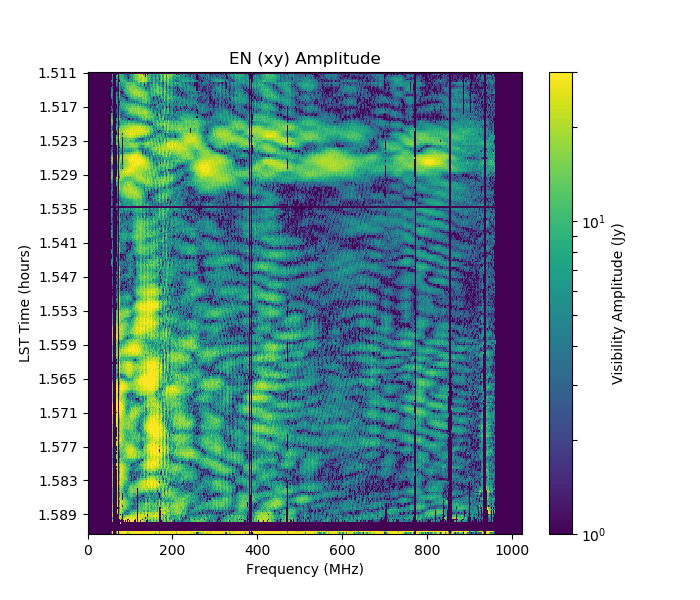

In [24]:
#Plot the figure
plt.figure(figsize=(7,6))
plt.imshow(np.abs(xy_array),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(xy_array),step), np.round(lstarrayxy*1000)/1000)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency (MHz)')
plt.title('EN (xy) Amplitude')
plt.show()

In [6]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
yx_array = []

for my_file in yx_files:
    #Read in the current data file and unphase
    uvyx.read_uvfits(my_file, run_check=False, run_check_acceptability=False)
    uvyx.unphase_to_drift()
    
    #Loop through the antenna array to find the specified antenna pair
    for i,ant1 in enumerate(uvyx.ant_1_array):
        ant2 = uvyx.ant_2_array[i]
        
        if (ant1==antenna1 and ant2==antenna2) or (ant1==antenna2 and ant2==antenna1):
            #Place the data into a temporary array
            temp_array =uvyx.data_array[i,0,:,0]
            #Get the times of the antennas
            times = uvyx.get_times((ant1,ant2))
            #Break out of the for loop
            break

    #Check if the array to be plotted has already been initialized
    #If it has not, we equate our plotting arrays with the temp arrays above
    #If it has been, we stack the new data into the plotting array
    if first ==True:
        print('setting full for first time')
        yx_array = temp_array
        yx_timearr = times
        first = False
    else:
        #print('vstacking...')
        yx_array = np.vstack((yx_array, temp_array))
        yx_timearr = np.hstack((yx_timearr,times))

print 'Data array shape:', yx_array.shape
print 'Time array shape:', yx_timearr.shape

setting full for first time
Data array shape: (272, 1024)
Time array shape: (1632,)


<IPython.core.display.Javascript object>


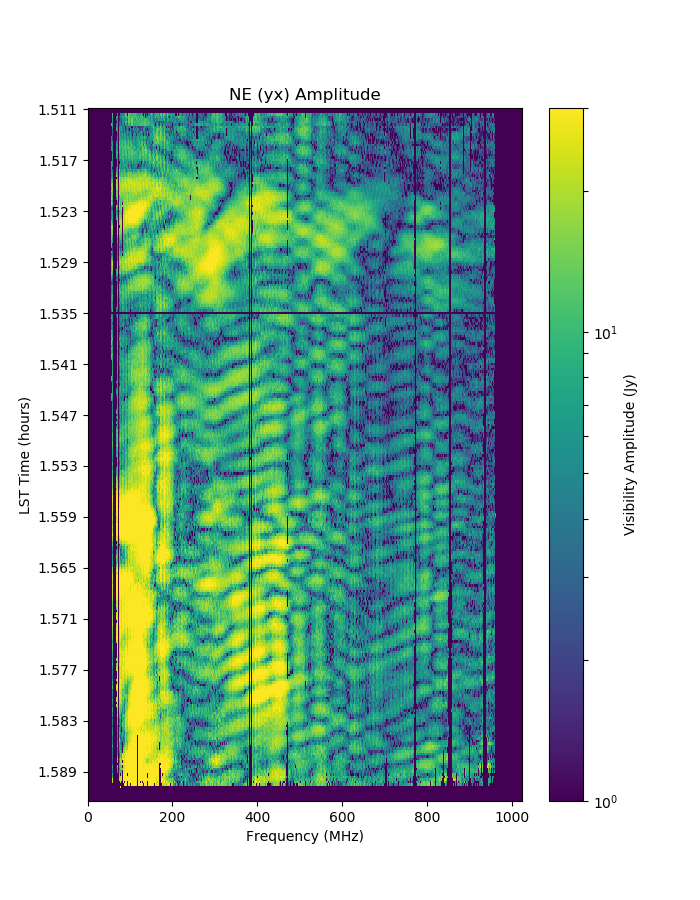

In [25]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yx_array),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(yx_array),step), np.round(lstarrayxy*1000)/1000)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency (MHz)')
plt.title('NE (yx) Amplitude')
plt.show()

Now let's plot the two polarizations side by side. We will lock the axes together so that when we zoom in on one plot, it zooms in on the other as well. 

<IPython.core.display.Javascript object>


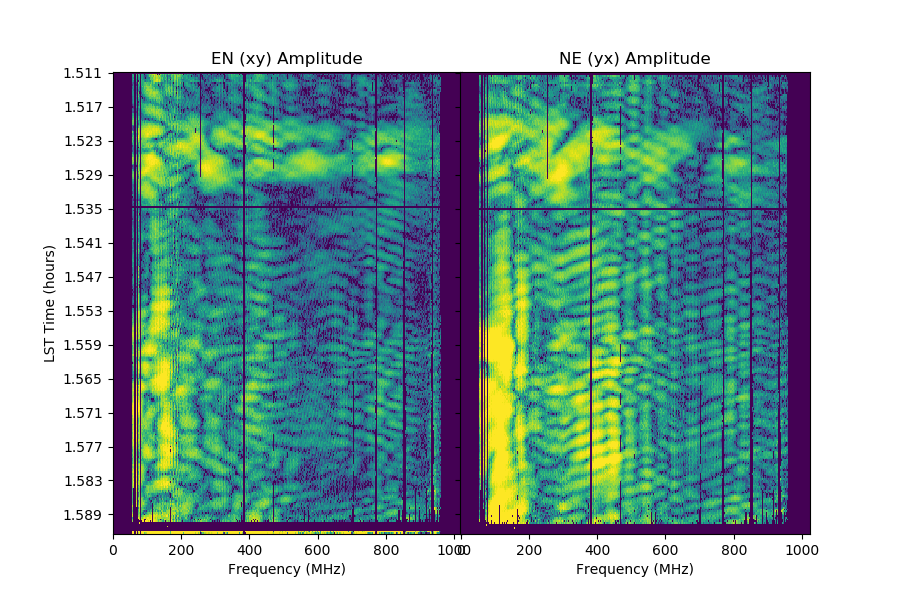

In [26]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(xy_array),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
plt.yticks(np.arange(0,len(xy_array),step), np.round(lstarrayxy*1000)/1000)
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency (MHz)')
plt.title('EN (xy) Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(yx_array),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
plt.xlabel('Frequency (MHz)')
plt.title('NE (yx) Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.005)

## 2: Delay Spectrum and Visibility Spectrum

Next, we are going to look at the delay spectrum of the data. This allows us to look at these constant offsets, since sky structure will be mostly averaged out. We also take a look at the visibility spectrum for both polarization. This allows us to see how much of the noise we arre seeing is caused by the constant offset delays. 

In [9]:
#Fourier transform the xy data along the freq axis and take the time average
vis_avg_delay_xy = np.mean(np.fft.fftshift(np.fft.fft(xy_array,axis=1)),axis=0)

#Find the frequency width of a channel in GHz
freq_width_xy = np.diff(uvxy.freq_array[0,:])[0]

#Convert frequencies to delays and convert to ns
delays_xy = np.fft.fftshift(np.fft.fftfreq(uvxy.Nfreqs,freq_width_xy))*1e9

#Fourier transform the yx data along the time axis and take the time average
vis_avg_delay_yx = np.mean(np.fft.fftshift(np.fft.fft(yx_array,axis=1)),axis=0)

<IPython.core.display.Javascript object>


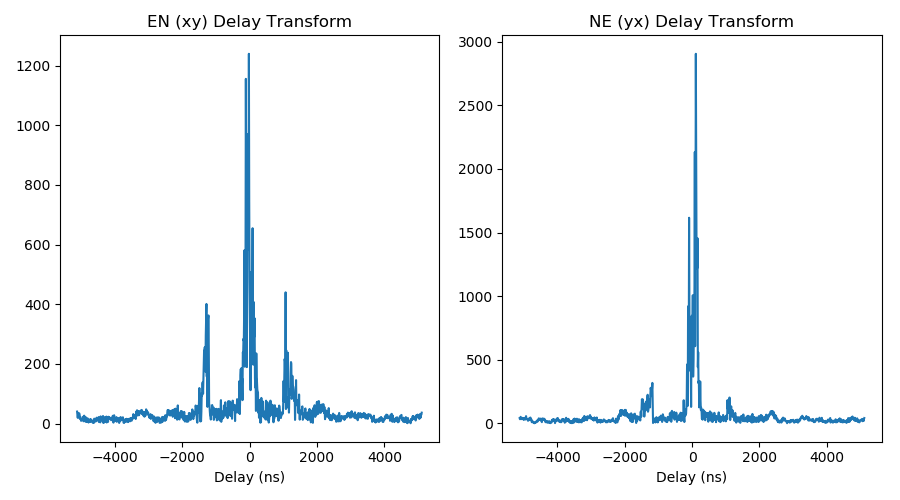

In [27]:
#Plot the delay spectrums for both polarizations

plt.figure(figsize=(9,5))

plt.subplot(121)
plt.plot(delays_xy,np.abs(vis_avg_delay_xy))
plt.xlabel('Delay (ns)')
plt.title('EN (xy) Delay Transform');

plt.subplot(122)
plt.plot(delays_xy,np.abs(vis_avg_delay_yx))
plt.xlabel('Delay (ns)')
plt.title('NE (yx) Delay Transform');

plt.tight_layout()

<IPython.core.display.Javascript object>


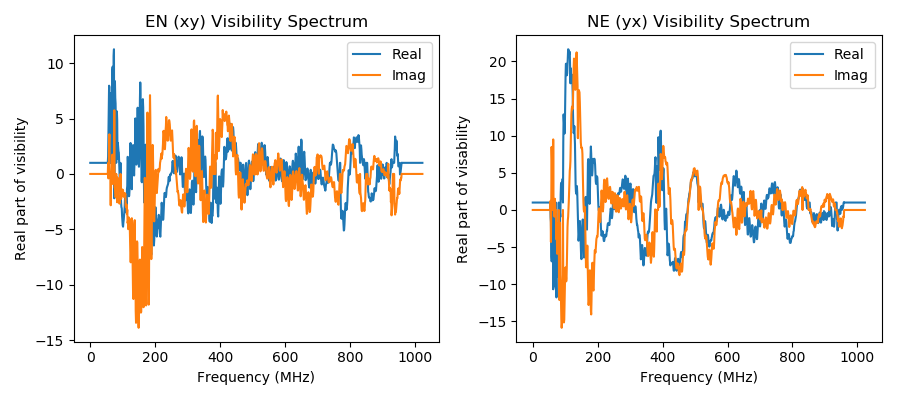

In [28]:
#Plot the visibility spectrums for both polarizations
plt.figure(figsize=(9,4))
#Take the mean of the time axis and plot both real and imaginary parts

#Plot for xy data
plt.subplot(121)
plt.plot(np.mean(xy_array, axis=0).real, label='Real')
plt.plot(np.mean(xy_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency (MHz)')
plt.title('EN (xy) Visibility Spectrum')
plt.legend()

#Plot for yx data
plt.subplot(122)
plt.plot(np.mean(yx_array, axis=0).real, label='Real')
plt.plot(np.mean(yx_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visability')
plt.xlabel('Frequency (MHz)')
plt.title('NE (yx) Visibility Spectrum')
plt.legend()

plt.tight_layout()
plt.show()

## 3: Next Steps

-  We are starting to get an idea of what could be causing these constant offsets in the data, but it is time consuming to rerun the code for each antenna pair. The next step is to find a way to look at the delay spectrum peaks for each antenna pair quickly and easily. 
    -  This can be seen in the 'Delay spectra amplitudes and delays investigation' notebook